In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
ga_counties = gpd.read_file("./Georgia_Counties/Georgia_Counties.shp")
combined_nlcd = pd.read_csv ("./Processed/Combined_NLCD.csv")

merged_gdf = ga_counties.merge(combined_nlcd,left_on = "NAMELSAD10", right_on = "County", how = "inner")
merged_gdf = merged_gdf.drop(
    ["WFD", "RDC_AAA", "MNGWPD", "MPO", "MSA", "F1HR_NA", "F8HR_NA"],
    axis=1
)
merged_gdf["Year"] = pd.to_datetime(merged_gdf["Year"], format="%Y")
filtered_gdf = merged_gdf[(merged_gdf["Year"].dt.year == 2019)]

dominant = filtered_gdf.groupby("County").apply(
    lambda group: group.loc[group["Area"].idxmax()]["Period"]
).to_dict()

filtered_gdf["dominant_land_cover"] = filtered_gdf["County"].map(dominant)

c:\Users\Jingh\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
filtered_gdf.to_file("nlcd_2019.shp")

C:\Users\Jingh\AppData\Local\Temp\ipykernel_6284\887238533.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  filtered_gdf.to_file("nlcd_2020.shp")
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field Year create as date field, though DateTime requested.
  ogr_write(
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'dominant_land_cover' to 'dominant_l'
  ogr_write(
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 5570179458.71968555 of field ShapeSTAre of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\Jingh\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 55

In [3]:
merged_gdf.head()

,OBJECTID_1,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,totpop10,WFD,RDC_AAA,MNGWPD,...,GlobalID,LINC_Regio,ShapeSTAre,ShapeSTLen,geometry,Unnamed: 0,Period,Year,Area,County
0,1,13,173,13173,Lanier,Lanier County,10078,N,N,N,...,{7D637994-1D29-4646-A85C-439C1A06EA0E},11,5.570179e+09,407122.504849,"POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...",49725,Open Water,1985-01-01,3.589226,Lanier County
1,1,13,173,13173,Lanier,Lanier County,10078,N,N,N,...,{7D637994-1D29-4646-A85C-439C1A06EA0E},11,5.570179e+09,407122.504849,"POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...",49726,Developed Open Space,1985-01-01,19.987346,Lanier County
2,1,13,173,13173,Lanier,Lanier County,10078,N,N,N,...,{7D637994-1D29-4646-A85C-439C1A06EA0E},11,5.570179e+09,407122.504849,"POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...",49727,Developed Low Intensity,1985-01-01,6.957051,Lanier County
3,1,13,173,13173,Lanier,Lanier County,10078,N,N,N,...,{7D637994-1D29-4646-A85C-439C1A06EA0E},11,5.570179e+09,407122.504849,"POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...",49728,Developed Medium Intensity,1985-01-01,0.321302,Lanier County
4,1,13,173,13173,Lanier,Lanier County,10078,N,N,N,...,{7D637994-1D29-4646-A85C-439C1A06EA0E},11,5.570179e+09,407122.504849,"POLYGON ((3.81e+05 3.46e+05, 3.81e+05 3.46e+05...",49729,Developed High Intensity,1985-01-01,0.087301,Lanier County


In [4]:
#1st visual most prominent land cover type for each county in year 2023
merged_2023 = merged_gdf[merged_gdf["Year"].dt.year == 2023].copy()
max_idx = merged_2023.groupby("NAMELSAD10")["Area"].idxmax()
prominent_lc = merged_2023.loc[max_idx]

lc_color_map = {
    "Open Water": "blue",
    "Developed Open Space": "pink",
    "Developed Low Intensity": "darkgray",
    "Developed Medium Intensity": "dimgray",
    "Developed High Intensity": "red",
    "Barren Land (Rock/Sand/Clay)": "peru",
    "Deciduous Forest": "limegreen",
    "Evergreen Forest": "forestgreen",
    "Mixed Forest": "darkgreen",
    "Shrub/Shrub": "olivedrab", 
    "Grasslands/Herbaceous": "palegoldenrod",
    "Pasture/Hay": "yellow",
    "Cultivated Crops": "orange",
    "Woody Wetlands": "teal",
    "Emergent Herbaceous Wetlands": "aqua"
}

prominent_lc["color"] = prominent_lc["Period"].map(lc_color_map).fillna("black")

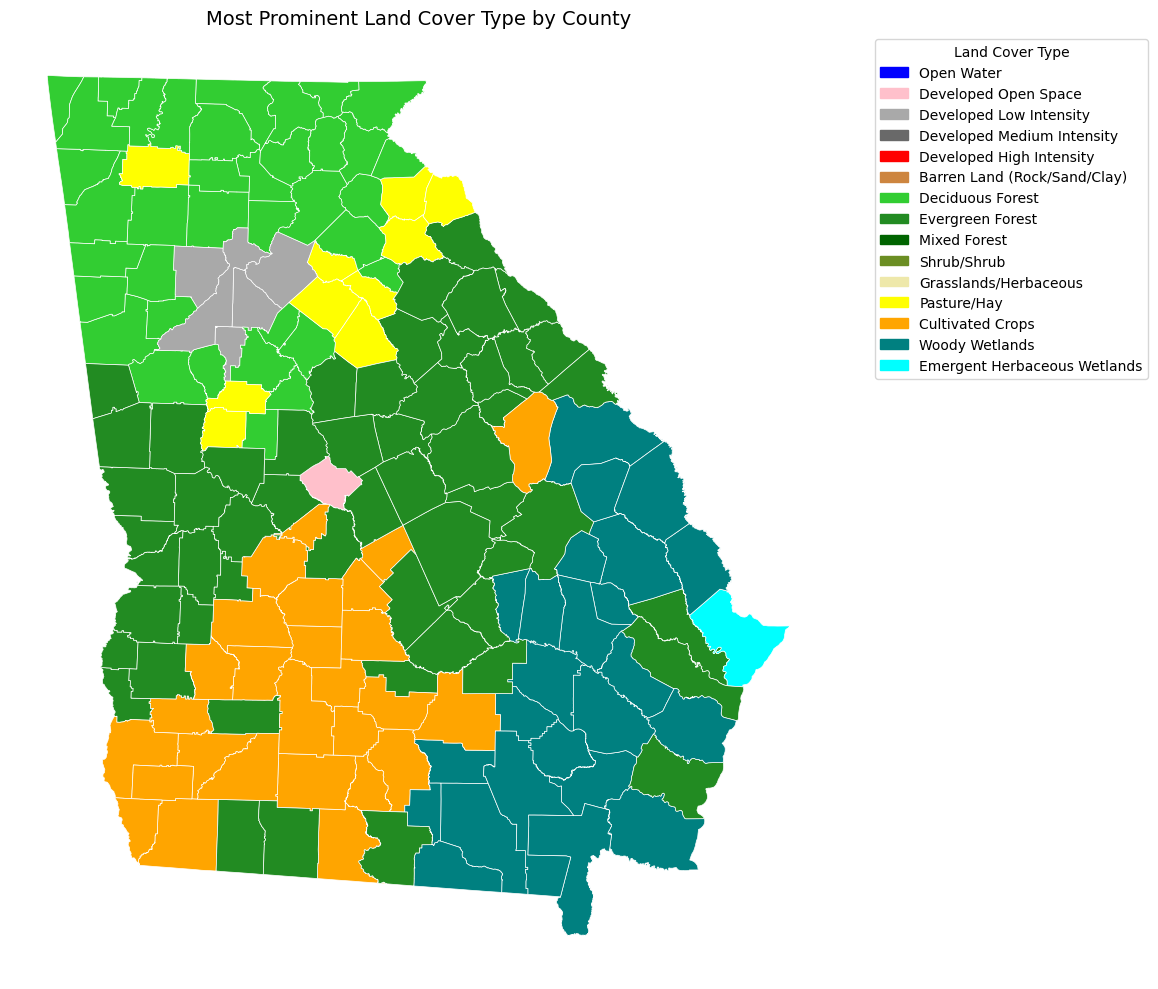

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
prominent_lc.plot(ax=ax, color=prominent_lc["color"], edgecolor="white", linewidth=0.5)

ax.set_title("Most Prominent Land Cover Type by County(2023)", fontsize=14)
ax.axis("off")

handles = []
for lc_type, color in lc_color_map.items():
    patch = mpatches.Patch(color=color, label=lc_type)
    handles.append(patch)

ax.legend(handles=handles, title="Land Cover Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [6]:
#2nd visual change of land covers over time
import plotly.express as px
import json
import ipywidgets as widgets
from IPython.display import display

In [ ]:
merged_gdf["geometry"] = merged_gdf["geometry"].simplify(tolerance=0.001)
merged_gdf = merged_gdf.to_crs(epsg=4326)
print('merged')
land_cover_types = sorted(merged_gdf["Period"].unique().tolist())

NameError: name 'merged_gdf' is not defined

In [ ]:
def plot_land_cover(lc_type):
    """
    Filters merged_gdf by the selected land cover type (lc_type),
    then creates an animated choropleth_mapbox with a year slider.
    """
    df_lc = merged_gdf[merged_gdf["Period"] == lc_type].copy()
    geojson_data = json.loads(df_lc.to_json())
    
    # Plotly Express choropleth_mapbox with animation_frame = year
    fig = px.choropleth_mapbox(
        df_lc,
        geojson=geojson_data,
        locations=df_lc.index,                
        color="Area",                         
        animation_frame=df_lc["Year"].dt.year, 
        mapbox_style="carto-positron",
        zoom=6,
        center={"lat": 32.1656, "lon": -82.9001},  
        color_continuous_scale="Viridis",     
        range_color=(df_lc["Area"].min(), df_lc["Area"].max()),
        title=f"Change Over Time for {lc_type}",
    )
    
    # Tidy up layout
    fig.update_layout(
        margin={"r":0,"t":40,"l":0,"b":0},
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
    )
    
    fig.show()

In [ ]:
dropdown = widgets.Dropdown(
    options=land_cover_types,
    value=land_cover_types[0],
    description="Land Cover:"
)

def on_dropdown_change(change):
    """
    When user selects a new land cover type from the dropdown,
    re-plot the map with the updated data.
    """
    if change["type"] == "change" and change["name"] == "value":
        plot_land_cover(change["new"])

In [ ]:
dropdown.observe(on_dropdown_change)
display(dropdown)
plot_land_cover(dropdown.value)